In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sys

# Print versions
print("Versions of installed libraries:")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"matplotlib.pyplot: {plt.matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"scikit-learn: {sklearn.__version__}")

Versions of installed libraries:
numpy: 1.26.4
pandas: 2.2.2
matplotlib.pyplot: 3.8.4
seaborn: 0.13.2
scikit-learn: 1.4.2


In [4]:
df = pd.read_csv('churn.csv')

In [6]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6167,3154-CFSZG,Male,0,Yes,Yes,47,Yes,No,Fiber optic,Yes,...,Yes,No,No,Yes,Month-to-month,No,Electronic check,90.05,4137.2,No
6677,1442-BQPVU,Female,0,No,No,13,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,29.15,357.15,No
587,8752-IMQOS,Male,0,Yes,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,85.1,No
6400,7921-BEPCI,Female,0,No,No,72,Yes,Yes,DSL,Yes,...,No,No,No,No,Two year,No,Bank transfer (automatic),59.75,4265,No
4577,0471-ARVMX,Female,1,Yes,No,62,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.85,6312.9,No
6418,2486-WYVVE,Male,0,Yes,No,31,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,79.30,2484,No
3120,3148-AOIQT,Female,0,Yes,No,69,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.95,1718.35,No
5718,9840-DVNDC,Male,0,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),80.50,463.05,Yes
6798,7562-UXTPG,Female,0,No,No,13,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,886.7,No
3770,5821-MMEIL,Female,0,Yes,No,57,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.90,1115.6,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df['TotalCharges'].replace({' ': np.nan}, inplace= True)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.dtypes

C:\Users\Swift3\AppData\Local\Temp\ipykernel_21648\3923400142.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].replace({' ': np.nan}, inplace= True)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# EDA 

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
cats = df.select_dtypes(include=['object'])
nums = df.select_dtypes(include=['float64', 'int64'])

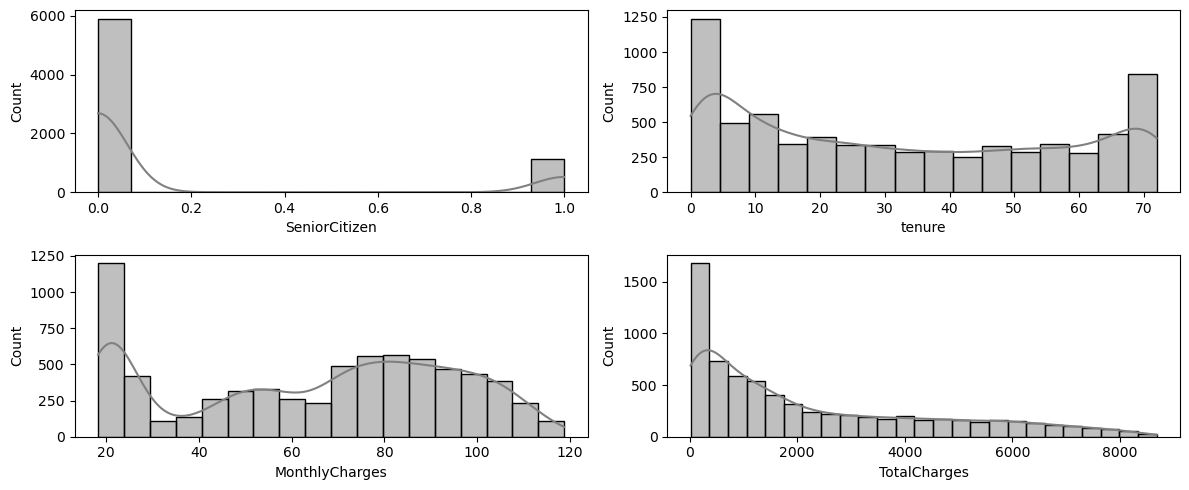

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


num_columns = nums.columns

plt.figure(figsize=(12, 5))
for i in range(len(num_columns)):
    plt.subplot(2, (len(num_columns) + 1) // 2, i + 1)
    sns.histplot(df[num_columns[i]], kde=True, color='gray')
    plt.tight_layout()

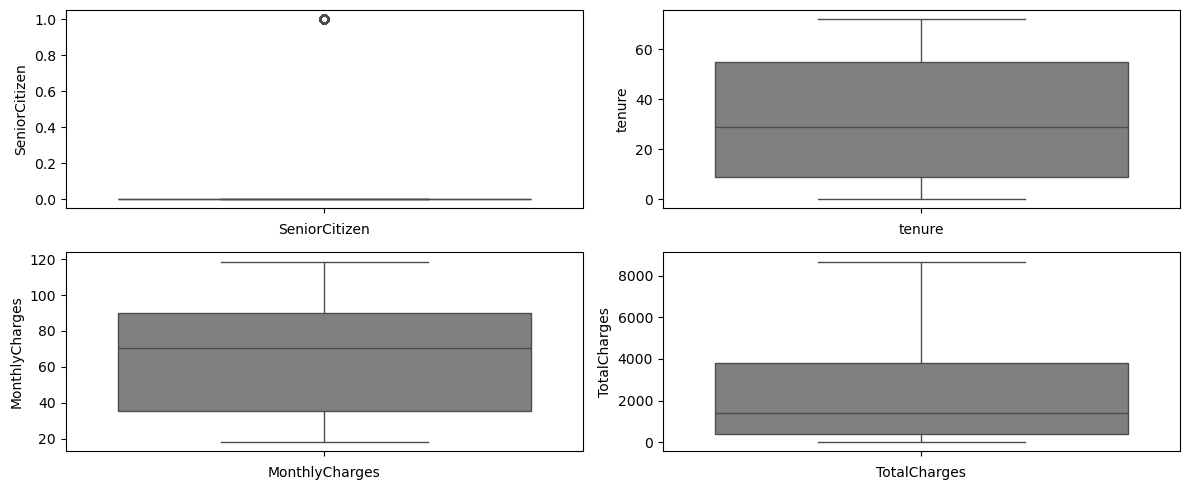

In [21]:
plt.figure(figsize=(12, 5))
for i in range(len(num_columns)):
    plt.subplot(2, (len(num_columns) + 1) // 2, i + 1)
    sns.boxplot(y=df[num_columns[i]], color='gray')
    plt.xlabel(num_columns[i])
    plt.tight_layout()

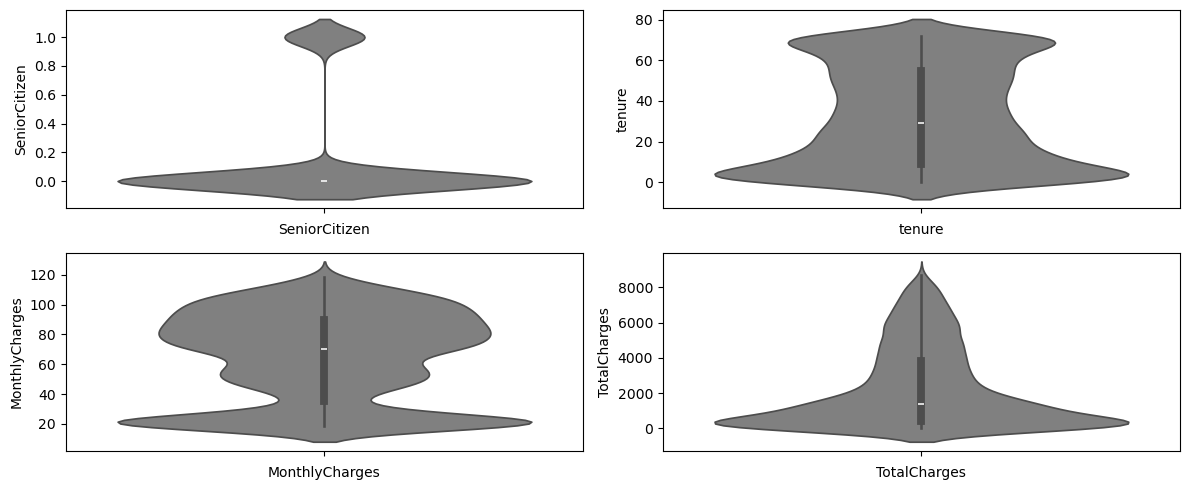

In [23]:
plt.figure(figsize=(12, 5))
for i in range(len(num_columns)):
    plt.subplot(2, (len(num_columns) + 1) // 2, i + 1)
    sns.violinplot(y=df[num_columns[i]], color='gray')
    plt.xlabel(num_columns[i])
    plt.tight_layout()

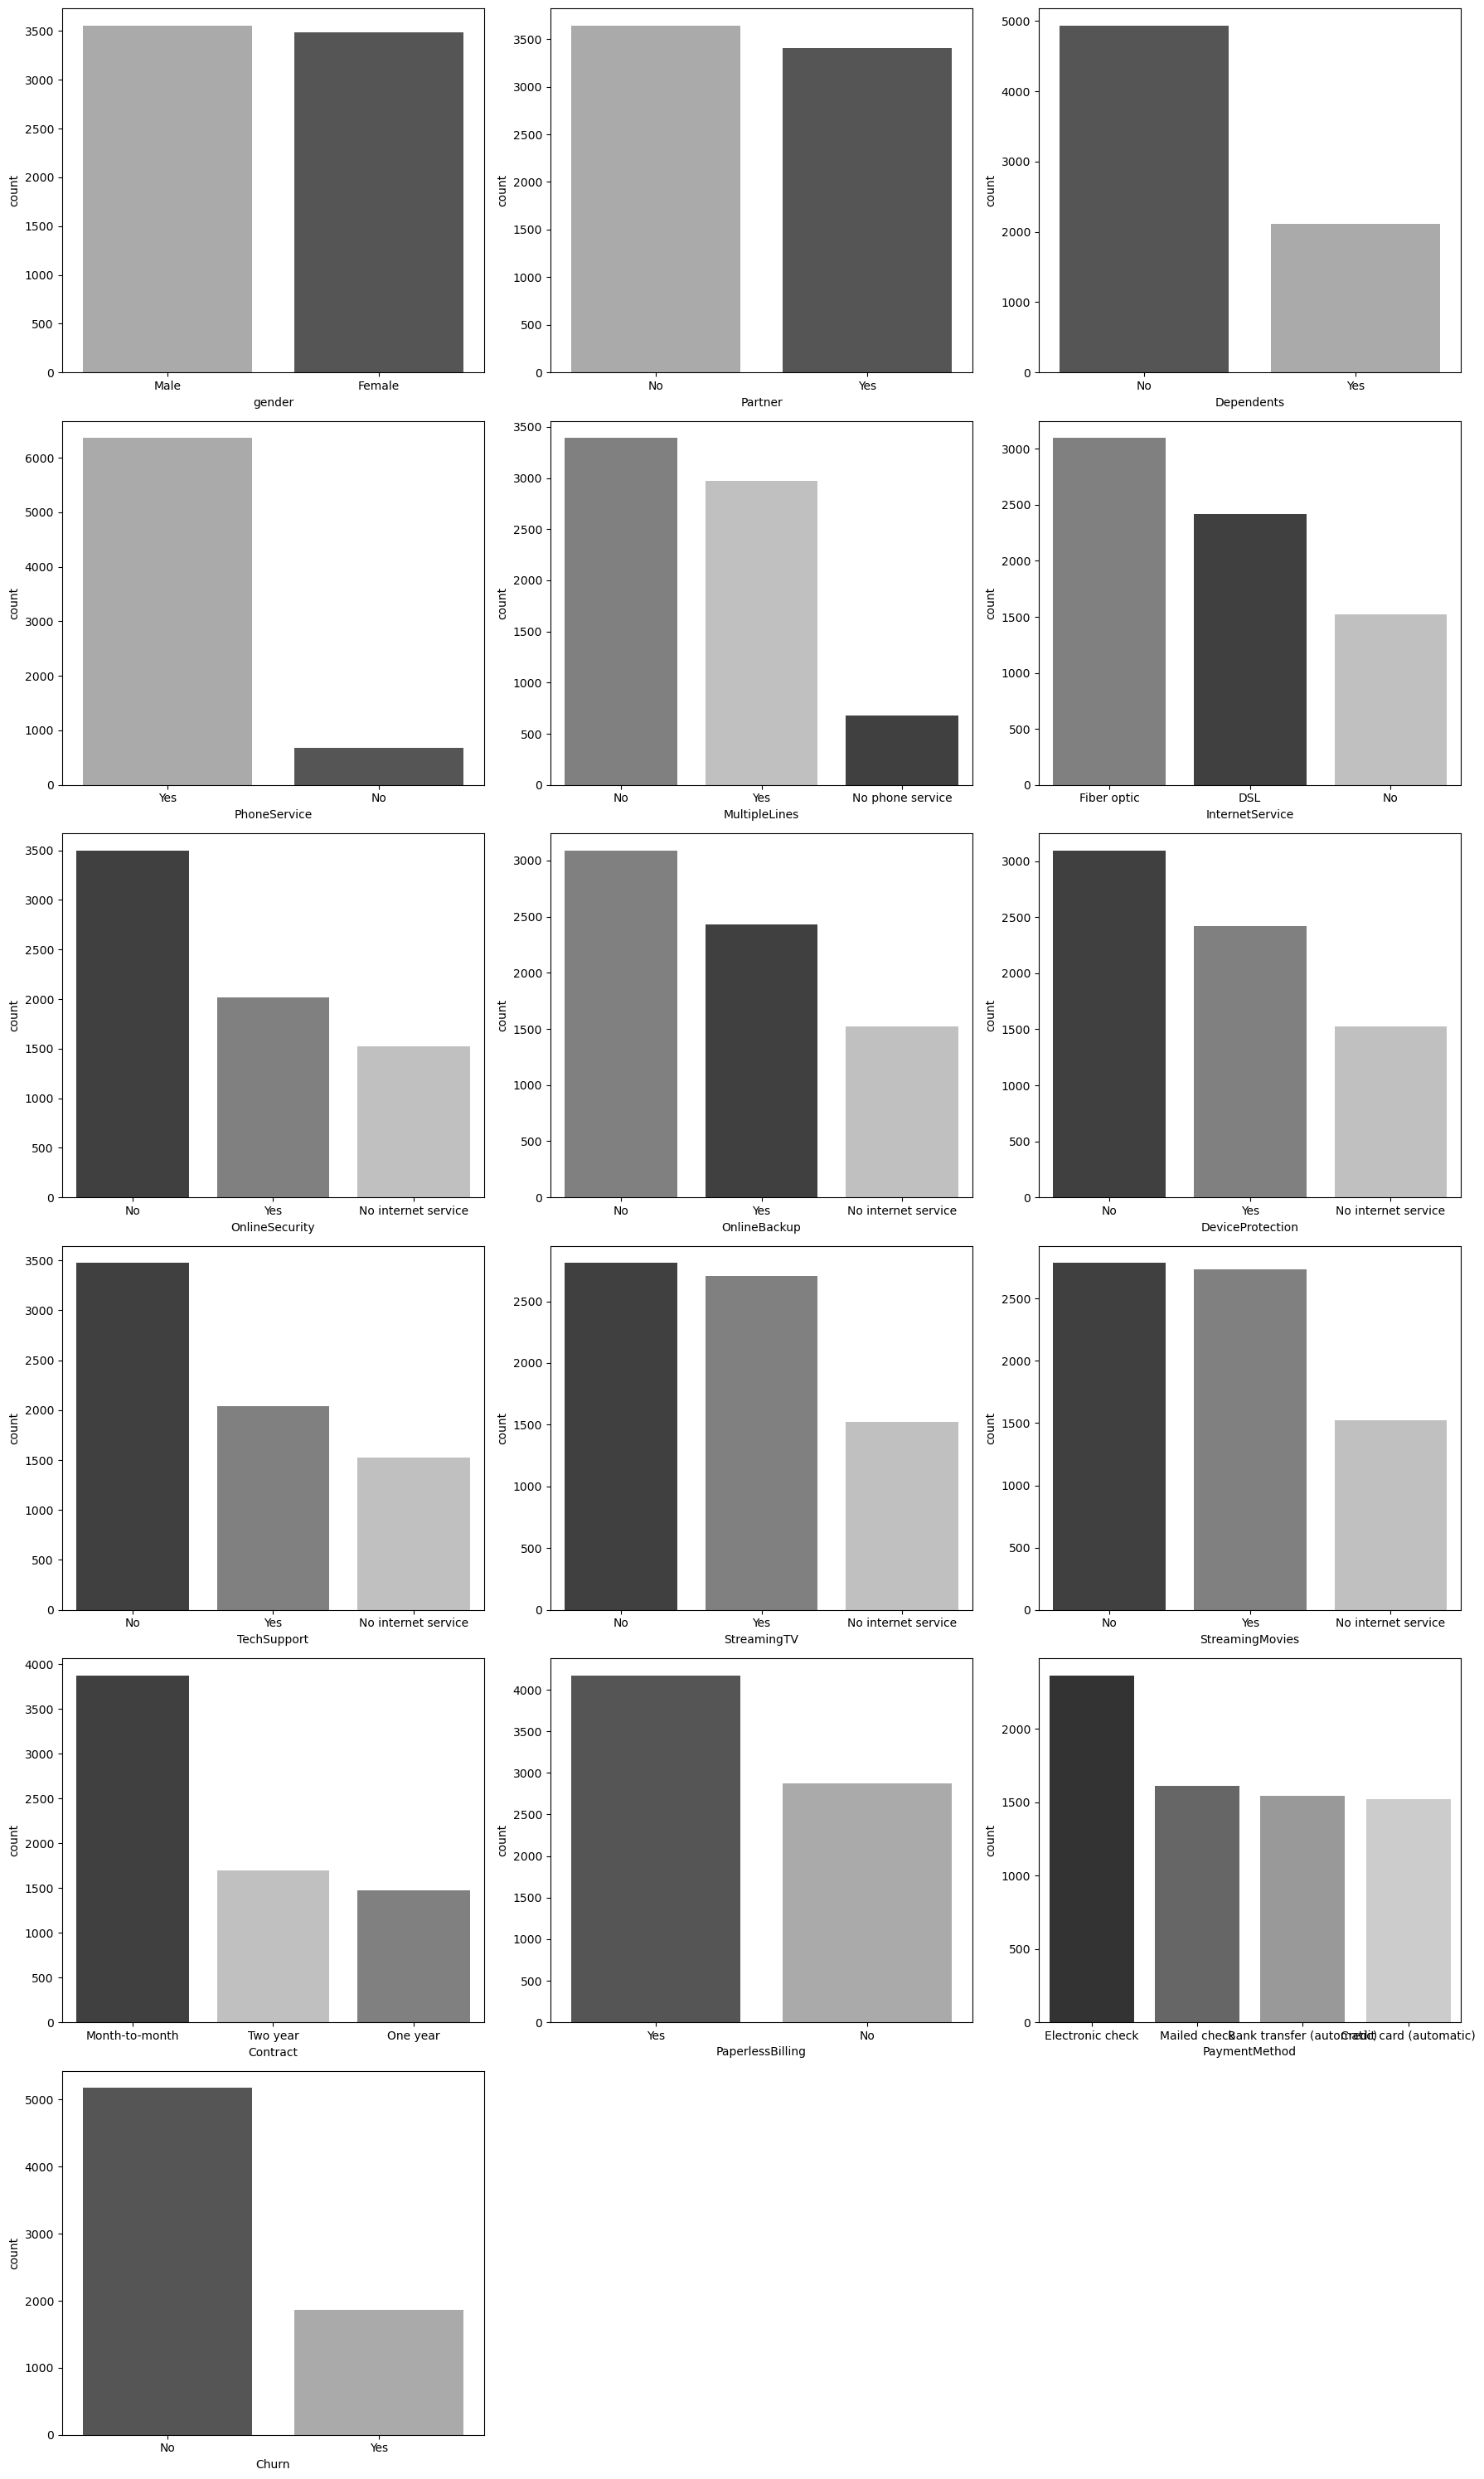

In [25]:
cats = cats.drop(columns=['customerID'])

cat_columns = cats.columns

plt.figure(figsize=(18, 5 * ((len(cat_columns) + 2) // 3)))
for i in range(len(cat_columns)):
    plt.subplot((len(cat_columns) + 2) // 3, 3, i + 1)
    sorted_order = df[cat_columns[i]].value_counts().index
    sns.countplot(x=df[cat_columns[i]], hue=df[cat_columns[i]], order=sorted_order, palette='gray', legend=False)
    plt.xlabel(cat_columns[i])
    plt.tight_layout()

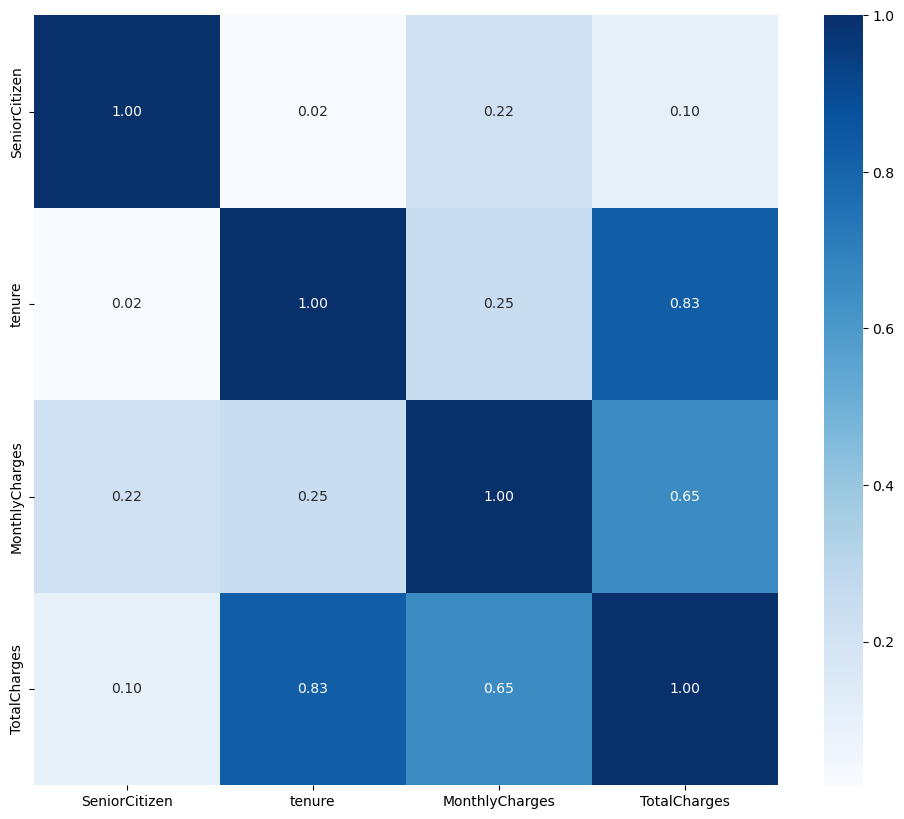

In [27]:
# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(nums.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

# Data Visualization

In [30]:
df2 = df.drop(columns='customerID')

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


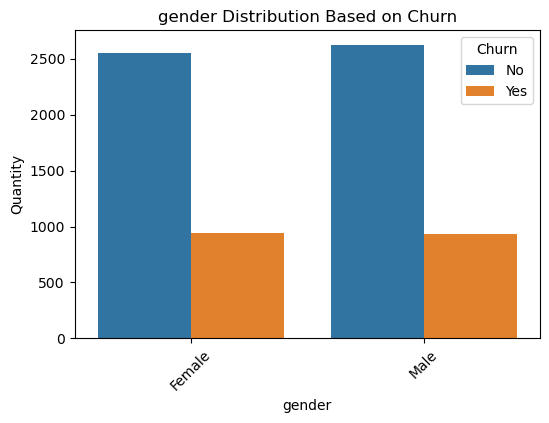

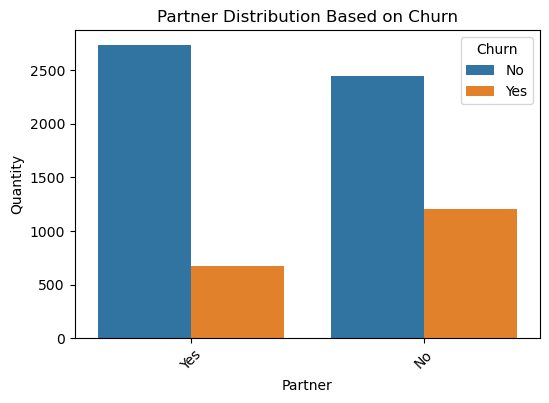

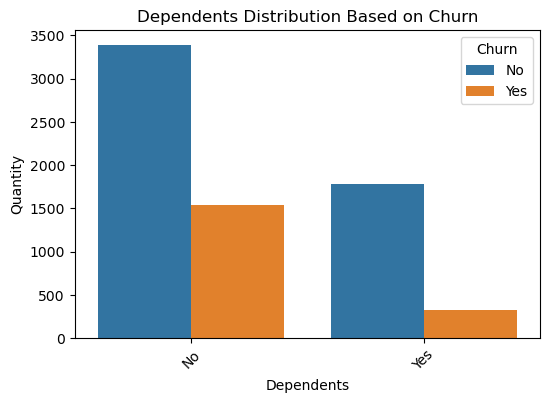

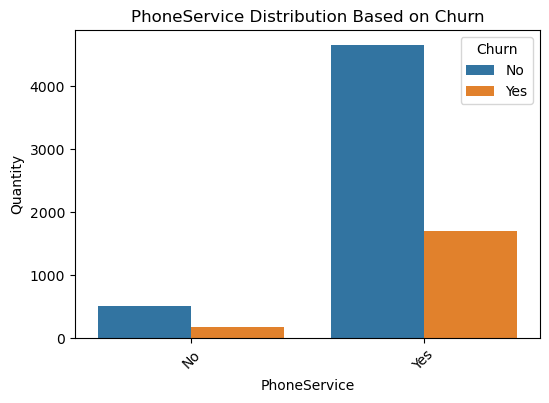

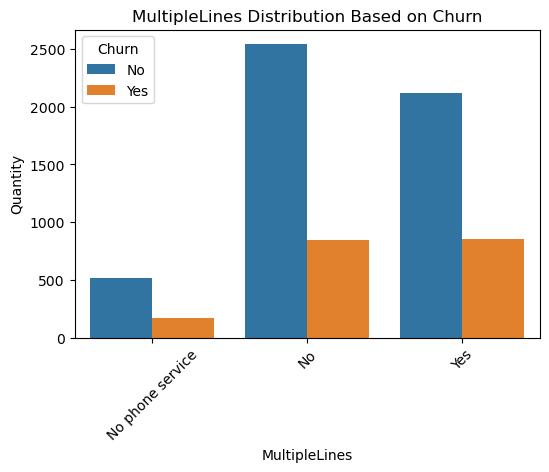

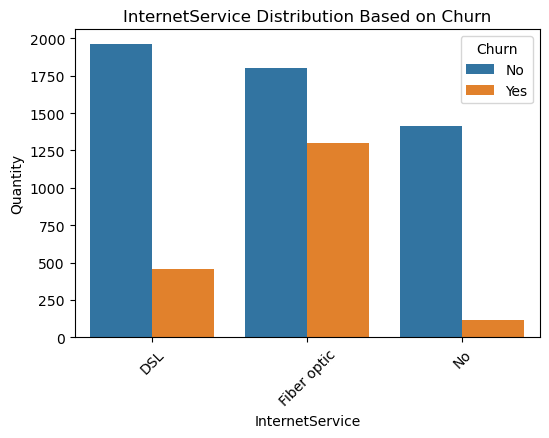

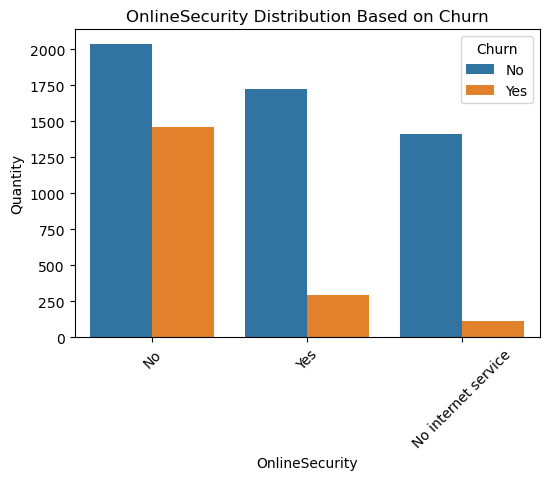

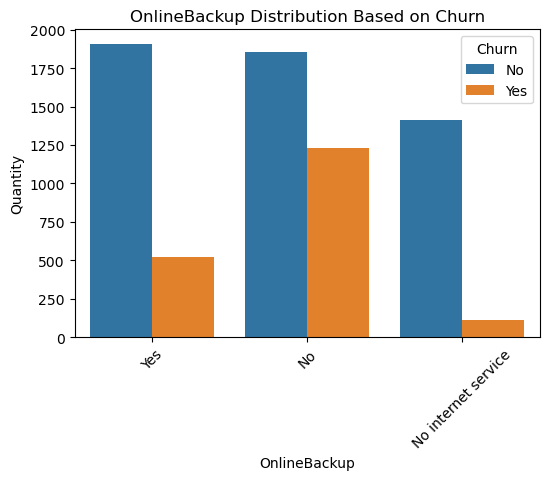

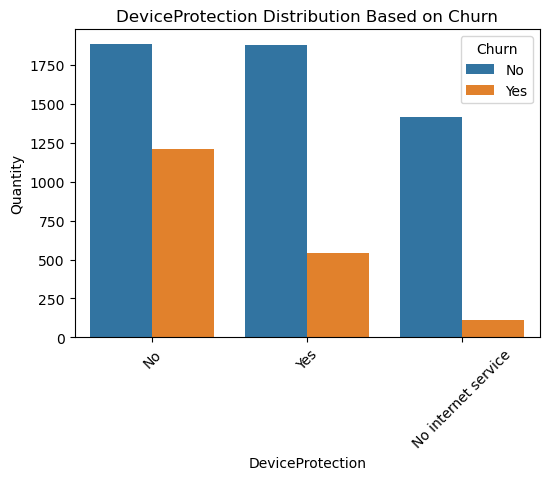

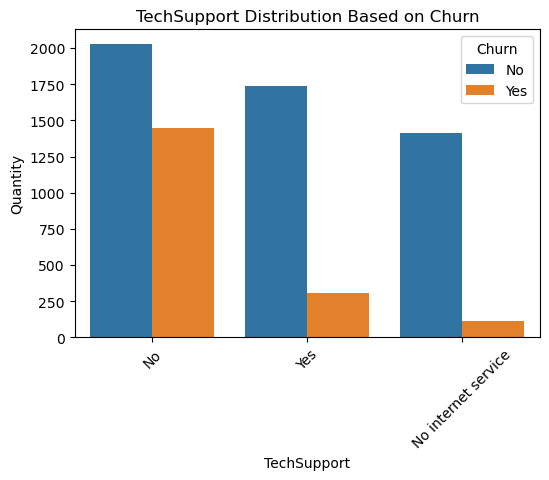

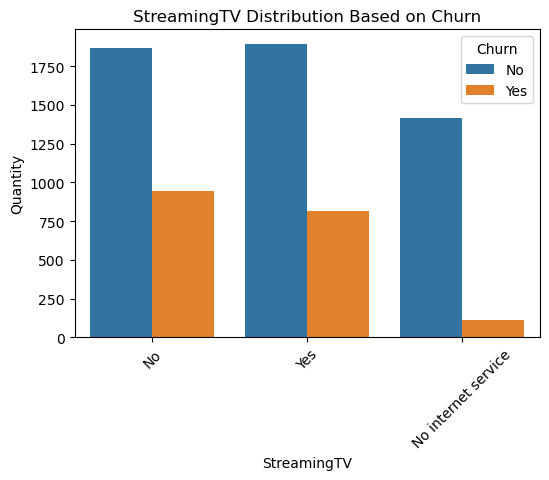

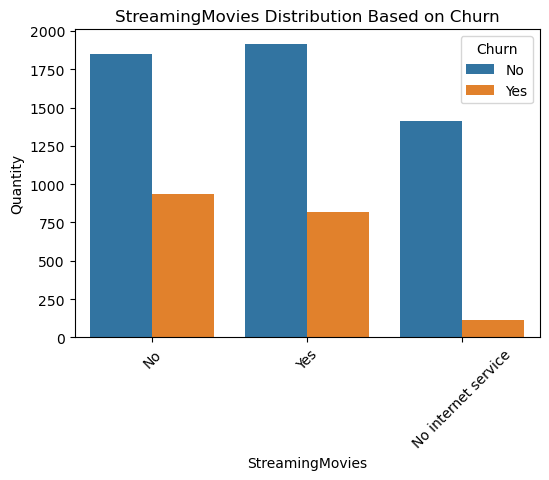

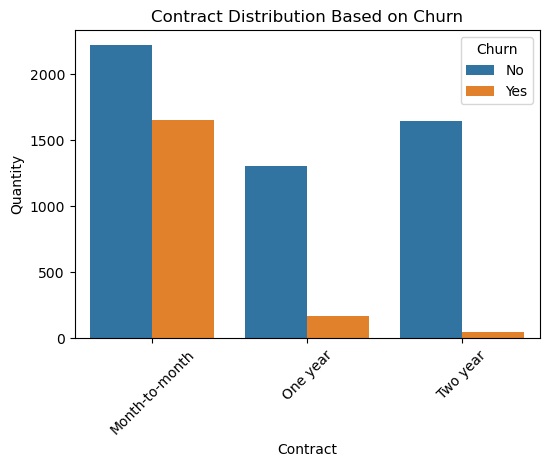

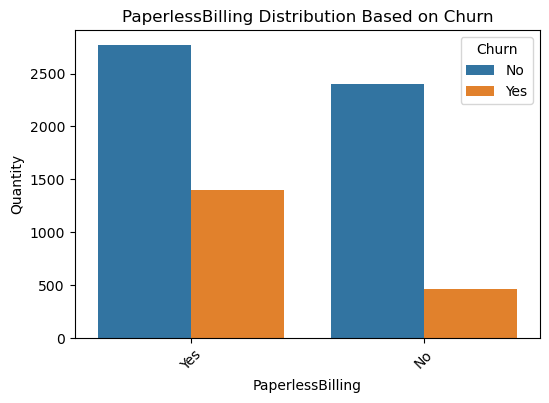

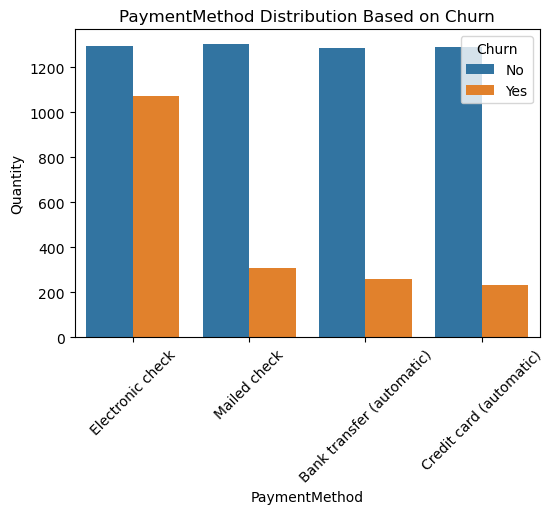

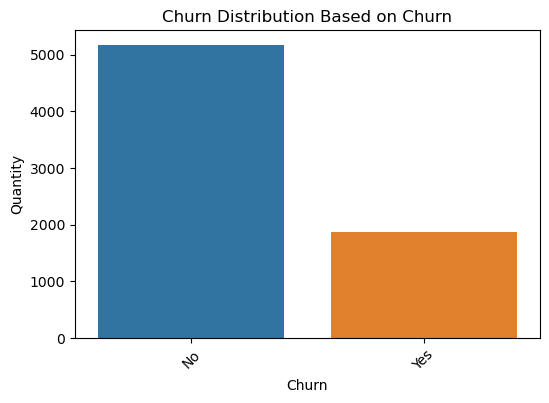

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

target = 'Churn'

# Only categorical
categorical_features = df2.select_dtypes(include=['object']).columns.tolist()

# Loop 
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sorted_order = df2[feature].value_counts().index
    sns.countplot(x=df2[feature], hue=df2[target])

    # Styling
    plt.title(f'{feature} Distribution Based on {target}')
    plt.xlabel(feature)
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)
    
    
    plt.show()

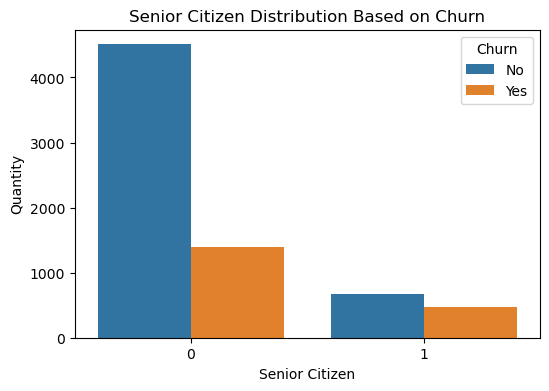

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['SeniorCitizen'], hue=df['Churn'])

# Styling
plt.title('Senior Citizen Distribution Based on Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Quantity')
plt.show()

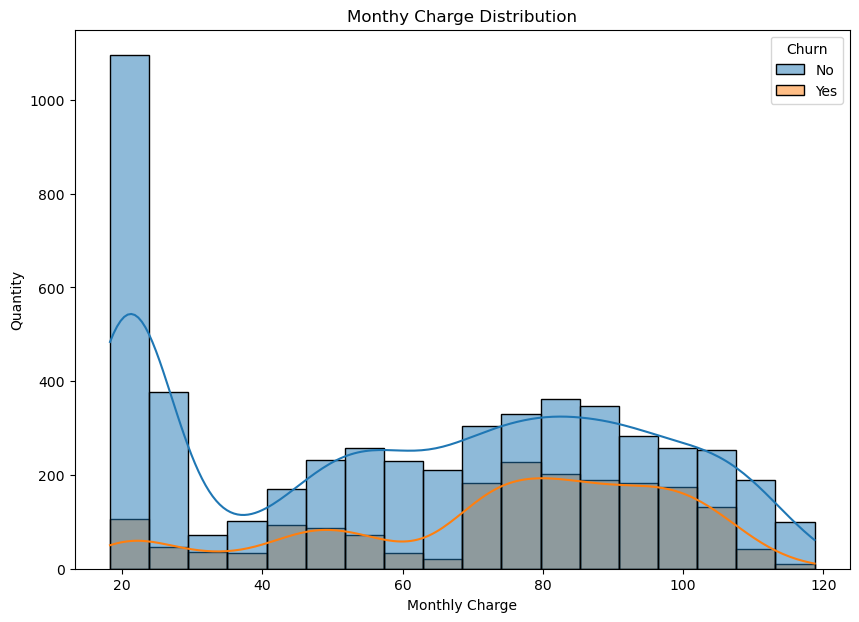

In [38]:
plt.figure(figsize = (10,7))
sns.histplot(data = df2, x='MonthlyCharges', hue ='Churn', kde = True, fill = True)

plt.title('Monthy Charge Distribution')
plt.xlabel('Monthly Charge')
plt.ylabel('Quantity')

plt.show()

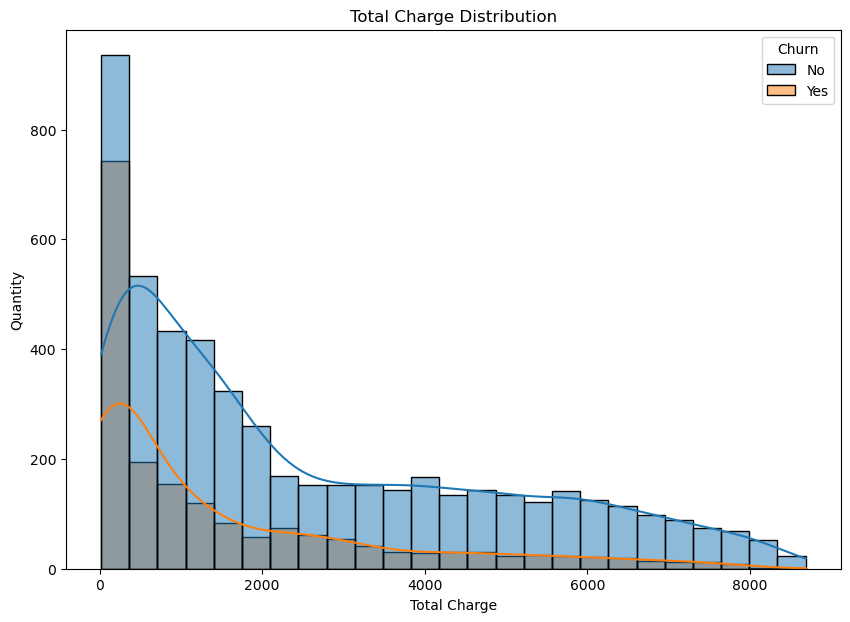

In [40]:
plt.figure(figsize = (10,7))
sns.histplot(data = df2, x='TotalCharges', hue ='Churn', kde = True, fill = True)

plt.title('Total Charge Distribution')
plt.xlabel('Total Charge')
plt.ylabel('Quantity')

plt.show()

# Feature Engineering

In [43]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [45]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3989,7634-WSWDB,Female,0,No,Yes,8,No,No phone service,DSL,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,38.50,330.80,No
3113,0396-YCHWO,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.40,3474.20,No
6358,1027-LKKQQ,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),80.45,5886.85,No
5614,3301-VKTGC,Male,0,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,One year,Yes,Bank transfer (automatic),85.50,5696.60,No
6882,8065-QBYTO,Female,1,No,No,71,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,One year,Yes,Credit card (automatic),99.65,7181.25,No
6763,7471-MQPOS,Male,1,Yes,Yes,71,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),72.90,5139.65,No
3548,0670-ANMUU,Male,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Yes,One year,No,Credit card (automatic),97.65,6687.85,No
1095,7439-DKZTW,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.55,80.55,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
1179,5461-QKNTN,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,94.30,3953.15,No


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
df = df.dropna()

In [51]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [53]:
log_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in log_columns:
    df[col + '_log'] = np.log(df[col] + 1)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7032 non-null   object 
 1   gender              7032 non-null   object 
 2   SeniorCitizen       7032 non-null   int64  
 3   Partner             7032 non-null   object 
 4   Dependents          7032 non-null   object 
 5   tenure              7032 non-null   int64  
 6   PhoneService        7032 non-null   object 
 7   MultipleLines       7032 non-null   object 
 8   InternetService     7032 non-null   object 
 9   OnlineSecurity      7032 non-null   object 
 10  OnlineBackup        7032 non-null   object 
 11  DeviceProtection    7032 non-null   object 
 12  TechSupport         7032 non-null   object 
 13  StreamingTV         7032 non-null   object 
 14  StreamingMovies     7032 non-null   object 
 15  Contract            7032 non-null   object 
 16  PaperlessBi

In [57]:
df.drop(columns=log_columns, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7032 non-null   object 
 1   gender              7032 non-null   object 
 2   SeniorCitizen       7032 non-null   int64  
 3   Partner             7032 non-null   object 
 4   Dependents          7032 non-null   object 
 5   PhoneService        7032 non-null   object 
 6   MultipleLines       7032 non-null   object 
 7   InternetService     7032 non-null   object 
 8   OnlineSecurity      7032 non-null   object 
 9   OnlineBackup        7032 non-null   object 
 10  DeviceProtection    7032 non-null   object 
 11  TechSupport         7032 non-null   object 
 12  StreamingTV         7032 non-null   object 
 13  StreamingMovies     7032 non-null   object 
 14  Contract            7032 non-null   object 
 15  PaperlessBilling    7032 non-null   object 
 16  PaymentMeth

In [61]:
def check_column_values(df):
    for column in df.columns:
        print(f"coloumn: {column}")
        print(f"data: {df[column].unique()}")
        print("-" * 50)

In [63]:
check_column_values(df) 

coloumn: customerID
data: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
coloumn: gender
data: ['Female' 'Male']
--------------------------------------------------
coloumn: SeniorCitizen
data: [0 1]
--------------------------------------------------
coloumn: Partner
data: ['Yes' 'No']
--------------------------------------------------
coloumn: Dependents
data: ['No' 'Yes']
--------------------------------------------------
coloumn: PhoneService
data: ['No' 'Yes']
--------------------------------------------------
coloumn: MultipleLines
data: ['No phone service' 'No' 'Yes']
--------------------------------------------------
coloumn: InternetService
data: ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
coloumn: OnlineSecurity
data: ['No' 'Yes' 'No internet service']
--------------------------------------------------
coloumn: OnlineBackup
data: ['Yes' 'No' 'No internet se

In [65]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['InternetService'] = df['InternetService'].replace('DSL', 'Yes')
df['InternetService'] = df['InternetService'].replace('Fiber optic', 'Yes')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')

In [67]:
check_column_values(df)

coloumn: customerID
data: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
coloumn: gender
data: ['Female' 'Male']
--------------------------------------------------
coloumn: SeniorCitizen
data: [0 1]
--------------------------------------------------
coloumn: Partner
data: ['Yes' 'No']
--------------------------------------------------
coloumn: Dependents
data: ['No' 'Yes']
--------------------------------------------------
coloumn: PhoneService
data: ['No' 'Yes']
--------------------------------------------------
coloumn: MultipleLines
data: ['No' 'Yes']
--------------------------------------------------
coloumn: InternetService
data: ['Yes' 'No']
--------------------------------------------------
coloumn: OnlineSecurity
data: ['No' 'Yes']
--------------------------------------------------
coloumn: OnlineBackup
data: ['Yes' 'No']
--------------------------------------------------
coloumn: DevicePro

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7032 non-null   object 
 1   gender              7032 non-null   object 
 2   SeniorCitizen       7032 non-null   int64  
 3   Partner             7032 non-null   object 
 4   Dependents          7032 non-null   object 
 5   PhoneService        7032 non-null   object 
 6   MultipleLines       7032 non-null   object 
 7   InternetService     7032 non-null   object 
 8   OnlineSecurity      7032 non-null   object 
 9   OnlineBackup        7032 non-null   object 
 10  DeviceProtection    7032 non-null   object 
 11  TechSupport         7032 non-null   object 
 12  StreamingTV         7032 non-null   object 
 13  StreamingMovies     7032 non-null   object 
 14  Contract            7032 non-null   object 
 15  PaperlessBilling    7032 non-null   object 
 16  PaymentMeth

In [71]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding for nominal categorical columns
cats_columns = ['Contract', 'PaymentMethod']

# One-hot encoding
df = pd.get_dummies(df, columns=cats_columns, drop_first=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   object 
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   object 
 4   Dependents                             7032 non-null   object 
 5   PhoneService                           7032 non-null   object 
 6   MultipleLines                          7032 non-null   object 
 7   InternetService                        7032 non-null   object 
 8   OnlineSecurity                         7032 non-null   object 
 9   OnlineBackup                           7032 non-null   object 
 10  DeviceProtection                       7032 non-null   object 
 11  TechSuppo

In [75]:
# Label Encoding for ordinal categorical columns
ordinal_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
    'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Looping to do Label Encoding
for column in ordinal_columns:
    # Fit dan transform data
    df[column] = label_encoder.fit_transform(df[column])

In [77]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,Churn,tenure_log,MonthlyCharges_log,TotalCharges_log,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6844,6897-UUBNU,1,0,0,0,1,0,1,0,1,...,0,0,3.401197,4.507006,7.872703,False,False,False,False,True
2817,0936-NQLJU,0,0,1,0,1,0,0,0,0,...,0,0,3.737670,3.075005,6.775994,False,True,True,False,False
3117,9844-FELAJ,0,1,1,1,1,1,1,0,1,...,1,0,4.262680,4.690430,8.919567,True,False,False,True,False
6896,3085-QUOZK,0,0,0,0,1,0,1,0,0,...,0,1,0.693147,3.805551,3.805551,False,False,False,False,True
1380,1131-SUEKT,1,0,1,1,1,0,1,0,1,...,1,0,4.127134,4.599655,8.723589,True,False,False,False,False
5637,4423-JWZJN,1,0,1,1,1,1,1,0,0,...,0,0,4.174387,4.513603,8.635891,True,False,True,False,False
5260,2495-KZNFB,0,0,0,0,1,1,1,1,0,...,1,0,3.526361,4.517977,8.003229,False,False,False,True,False
2976,4830-FAXFM,1,0,0,1,1,1,0,0,0,...,1,0,2.995732,3.222868,6.087229,False,False,True,False,False
3425,0369-ZGOVK,0,0,1,1,1,0,1,0,0,...,1,0,3.367296,4.268298,7.597497,True,False,False,False,False
5102,9070-BCKQP,0,0,1,0,1,1,1,1,0,...,1,0,4.290459,4.710881,8.972362,False,True,True,False,False


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int32  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int32  
 4   Dependents                             7032 non-null   int32  
 5   PhoneService                           7032 non-null   int32  
 6   MultipleLines                          7032 non-null   int32  
 7   InternetService                        7032 non-null   int32  
 8   OnlineSecurity                         7032 non-null   int32  
 9   OnlineBackup                           7032 non-null   int32  
 10  DeviceProtection                       7032 non-null   int32  
 11  TechSuppo

In [81]:
for col in df.columns:
    if df[col].dtype in ['bool', 'int32']:
        df[col] = df[col].astype('int64')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   InternetService                        7032 non-null   int64  
 8   OnlineSecurity                         7032 non-null   int64  
 9   OnlineBackup                           7032 non-null   int64  
 10  DeviceProtection                       7032 non-null   int64  
 11  TechSuppo

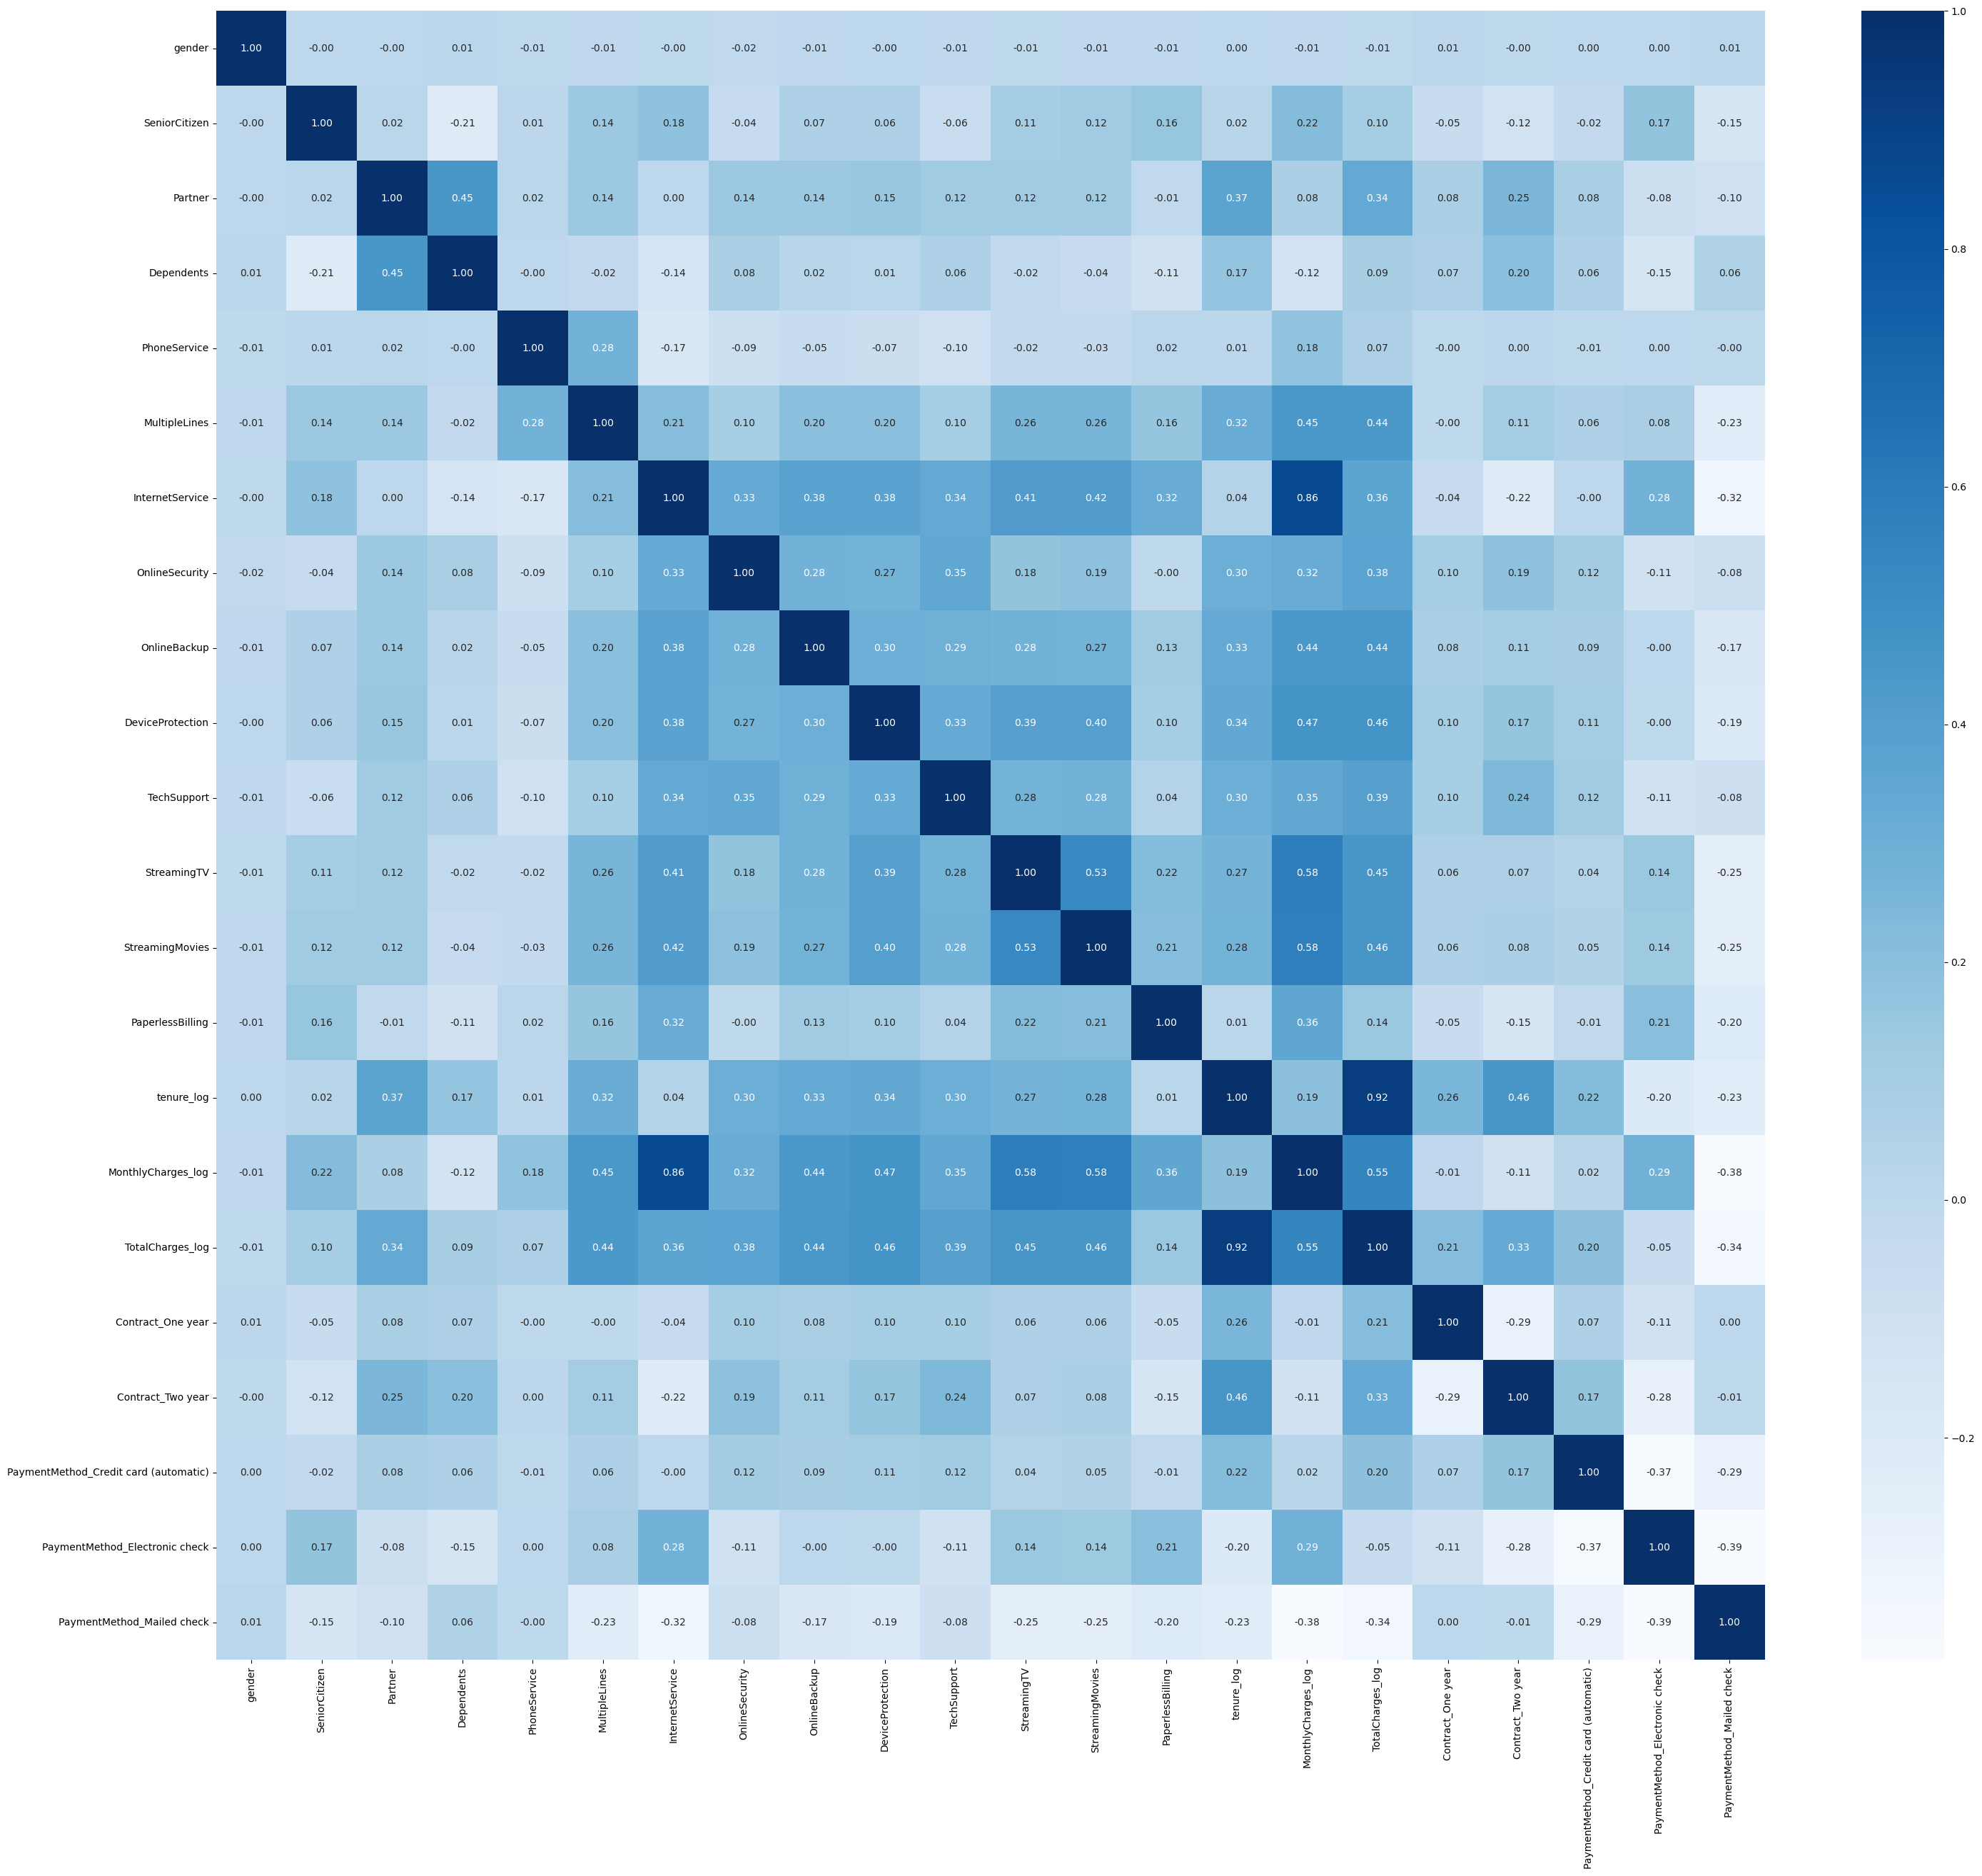

In [85]:
numeric_df = df.select_dtypes(include=['float64','int64'])
numeric_df = numeric_df.drop(columns=['Churn'])
plt.figure(figsize=(35, 30))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [87]:
dfvif = df.drop(columns=['customerID'])

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd

# Pastikan kolom hanya numerik
dfvif = dfvif.select_dtypes(include=[np.number])

# Isi missing values jika ada
dfvif = dfvif.fillna(dfvif.mean())

# Drop kolom dengan varians nol
dfvif = dfvif.loc[:, dfvif.var() != 0]

# Hitung VIF
vif_data = pd.DataFrame()
vif_data["feature"] = dfvif.columns
vif_data["VIF"] = [variance_inflation_factor(dfvif.values, i) for i in range(dfvif.shape[1])]

print(vif_data)

                                  feature          VIF
0                                  gender     2.019639
1                           SeniorCitizen     1.369416
2                                 Partner     2.808293
3                              Dependents     1.956508
4                            PhoneService    19.708718
5                           MultipleLines     2.319317
6                         InternetService    25.092404
7                          OnlineSecurity     1.943975
8                            OnlineBackup     2.053756
9                        DeviceProtection     2.242020
10                            TechSupport     2.058900
11                            StreamingTV     2.672104
12                        StreamingMovies     2.726296
13                       PaperlessBilling     2.961871
14                                  Churn     1.929477
15                             tenure_log  1311.869818
16                     MonthlyCharges_log   986.425997
17        

# Data Preprocessing

In [92]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn', 'tenure_log',
       'MonthlyCharges_log', 'TotalCharges_log', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [94]:
# Features
X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'tenure_log',
       'MonthlyCharges_log', 'TotalCharges_log', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

# Target
y = df['Churn']

In [96]:
# save customerID
df_id = df[["customerID"]].copy()

In [98]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

<Axes: ylabel='count'>

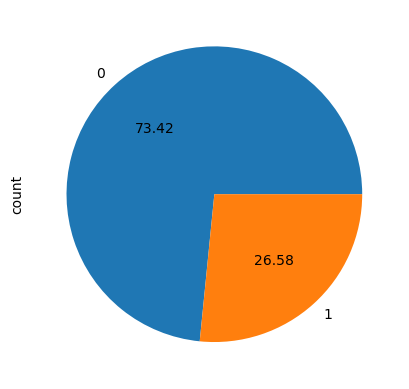

In [100]:
y.value_counts().plot.pie(autopct = '%.2f')

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [104]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Oversampling on data train
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Churn
0    4130
1    1495
Name: count, dtype: int64
After SMOTE: Churn
0    4130
1    4130
Name: count, dtype: int64


# Modelling

## Evaluation

In [108]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification_smote(model, X_train_smote, y_train_smote, X_test, y_test):
    # Prediction model
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_smote)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_smote)

    # Eval
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train_smote, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train_smote, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train_smote, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train_smote, y_pred_train))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_smote, y_pred_proba_train[:, 1]))

## Logistic Regression

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [113]:
from sklearn.linear_model import LogisticRegression

# Model
logreg = LogisticRegression()

# Fit model
logreg.fit(X_train_scaled, y_train_smote)

# Eval
eval_classification_smote(logreg, X_train_scaled, y_train_smote, X_test_scaled, y_test)

Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.80
Precision (Test Set): 0.53
Precision (Train Set): 0.78
Recall (Test Set): 0.76
Recall (Train Set): 0.84
F1-Score (Test Set): 0.62
F1-Score (Train Set): 0.81
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.88


In [115]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameter grid
penalty = ['l1', 'l2']
C = np.logspace(-4, 1, 100)  # Range of C in log-scale
hyperparameters = dict(penalty=penalty, C=C)

# Logistic Regression with saga solver
logreg = LogisticRegression(solver='saga', max_iter=1000)

# RandomizedSearchCV with recall as scoring metric
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='recall', random_state=1, cv=5, n_iter=50)
rs.fit(X_train_scaled, y_train_smote)

eval_classification_smote(rs, X_train_scaled, y_train_smote, X_test_scaled, y_test)

Accuracy (Test Set): 0.73
Accuracy (Train Set): 0.78
Precision (Test Set): 0.49
Precision (Train Set): 0.75
Recall (Test Set): 0.81
Recall (Train Set): 0.84
F1-Score (Test Set): 0.61
F1-Score (Train Set): 0.80
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.87


In [117]:
print("Best parameters:", rs.best_params_)
print("Best recall score:", rs.best_score_)

Best parameters: {'penalty': 'l1', 'C': 0.002915053062825176}
Best recall score: 0.8462469733656175


In [119]:
coefficients = rs.best_estimator_.coef_[0]
features = X_train_smote.columns


feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)


print(feature_importance.head(10))

                           Feature  Coefficient  Abs_Coefficient
15              MonthlyCharges_log     0.476700         0.476700
14                      tenure_log    -0.458652         0.458652
18               Contract_Two year    -0.441589         0.441589
17               Contract_One year    -0.247254         0.247254
7                   OnlineSecurity    -0.207245         0.207245
10                     TechSupport    -0.128845         0.128845
3                       Dependents    -0.101855         0.101855
20  PaymentMethod_Electronic check     0.100275         0.100275
6                  InternetService     0.016694         0.016694
0                           gender     0.000000         0.000000


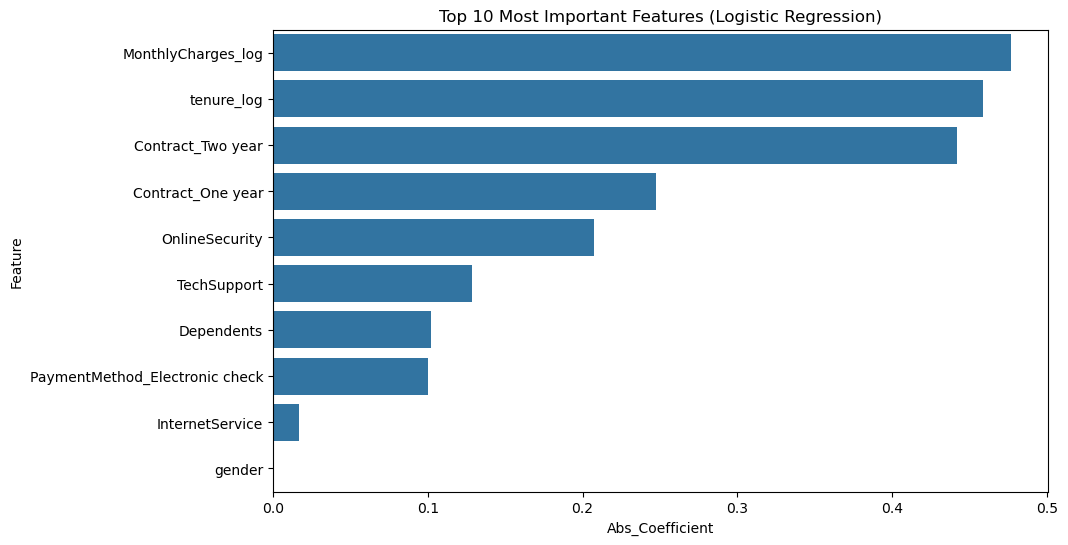

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features (Logistic Regression)')
plt.show()

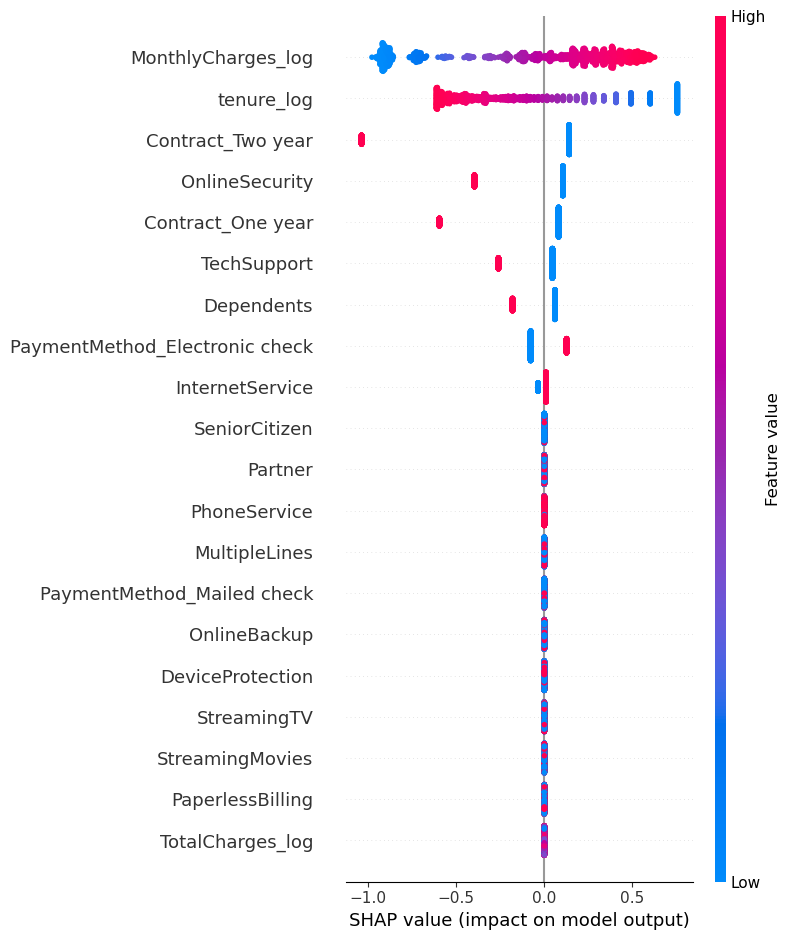

In [123]:
import shap
import matplotlib.pyplot as plt


explainer = shap.Explainer(rs.best_estimator_, X_train_scaled)


shap_values = explainer(X_test_scaled)


shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

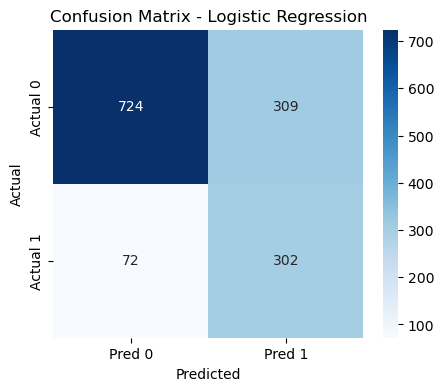

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.81      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407



In [125]:
from sklearn.metrics import confusion_matrix, classification_report

# vest model
best_logreg = rs.best_estimator_

# predict
y_pred = best_logreg.predict(X_test_scaled)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# visualization
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


print(classification_report(y_test, y_pred))

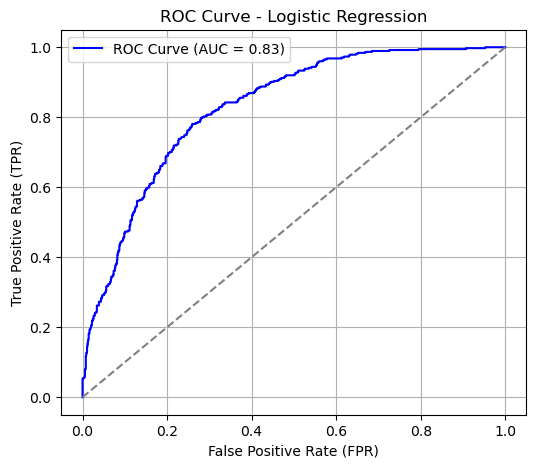

In [127]:
from sklearn.metrics import roc_curve, roc_auc_score

# highest probability for churn
y_prob = rs.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# FPR, TPR, threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()

In [129]:
# Youden’s J statistic (TPR - FPR)
youden_index = tpr - fpr

# best threshold from highest Youden's J
best_threshold = thresholds[np.argmax(youden_index)]

print(f'Best threshold from roc curve: {best_threshold:.3f}')

Best threshold from roc curve: 0.535


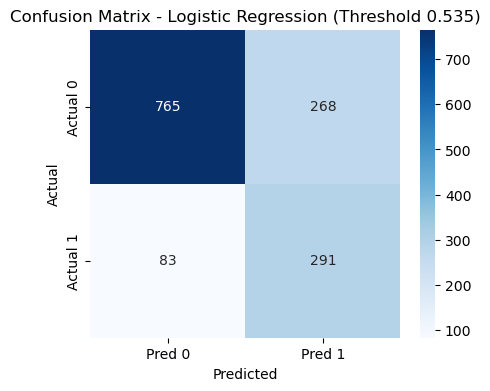

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.78      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



In [131]:
# best model
best_logreg = rs.best_estimator_

# highest probability for churn
y_prob = best_logreg.predict_proba(X_test_scaled)[:, 1]

# change threshold to 0.535
threshold = 0.535
y_pred_threshold = np.where(y_prob >= threshold, 1, 0)

# new cm
cm = confusion_matrix(y_test, y_pred_threshold)

# visualization
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Logistic Regression (Threshold {threshold})')
plt.show()

print(classification_report(y_test, y_pred_threshold))

In [133]:
# Add customerID to dataframe data testing
df_test = X_test.copy()
df_test["customer_id"] = df_id.loc[X_test.index, "customerID"]

# Add actual churn for the Y
df_test["actual_churn"] = y_test

# Predict probability
df_test["churn_probability"] = rs.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# Churn prediction based on best_threshold
df_test["churn_prediction"] = (df_test["churn_probability"] >= best_threshold).astype(int)

In [135]:
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges_log,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_id,actual_churn,churn_probability,churn_prediction
974,0,0,1,1,1,0,1,0,1,0,...,8.421420,0,1,1,0,0,0604-THJFP,0,0.169396,0
619,0,0,0,0,1,1,1,0,1,0,...,6.261396,0,0,0,0,0,4059-IIEBK,0,0.716914,1
4289,0,0,0,0,1,0,0,0,0,0,...,6.985133,0,1,0,0,1,2228-BZDEE,0,0.100577,0
3721,0,0,0,0,1,0,0,0,0,0,...,3.681351,0,0,0,0,1,2839-RFSQE,1,0.528642,0
4533,0,0,1,0,1,1,1,0,1,1,...,8.930097,0,1,0,0,0,5360-LJCNJ,0,0.303581,0


## KNN

In [128]:
# knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train_smote)
eval_classification_smote(knn, X_train_scaled, y_train_smote, X_test_scaled, y_test)

Accuracy (Test Set): 0.71
Accuracy (Train Set): 0.86
Precision (Test Set): 0.48
Precision (Train Set): 0.82
Recall (Test Set): 0.71
Recall (Train Set): 0.93
F1-Score (Test Set): 0.57
F1-Score (Train Set): 0.87
roc_auc (test-proba): 0.77
roc_auc (train-proba): 0.95


In [130]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train_scaled, y_train_smote)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='recall', random_state=1, cv=5)
rs.fit(X_train_scaled, y_train_smote)
eval_classification_smote(rs, X_train_scaled, y_train_smote, X_test_scaled, y_test)

Accuracy (Test Set): 0.72
Accuracy (Train Set): 0.90
Precision (Test Set): 0.48
Precision (Train Set): 0.85
Recall (Test Set): 0.67
Recall (Train Set): 0.95
F1-Score (Test Set): 0.56
F1-Score (Train Set): 0.90
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.97


## Decision Tree

In [133]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train_smote)
eval_classification_smote(dt, X_train_scaled, y_train_smote, X_test_scaled, y_test)

Accuracy (Test Set): 0.72
Accuracy (Train Set): 1.00
Precision (Test Set): 0.48
Precision (Train Set): 1.00
Recall (Test Set): 0.59
Recall (Train Set): 1.00
F1-Score (Test Set): 0.53
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.68
roc_auc (train-proba): 1.00


In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num=30)]
min_samples_split = [2, 5, 10, 100] 
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['sqrt', 'log2']
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV with recall as scoring
gs = GridSearchCV(dt, hyperparameters, cv=5, scoring='recall')
gs.fit(X_train_scaled, y_train_smote)

# Predict & Evaluation
y_pred = gs.predict(X_test_scaled)
eval_classification_smote(gs, X_train_scaled, y_train_smote, X_test_scaled, y_test)

Accuracy (Test Set): 0.64
Accuracy (Train Set): 0.71
Precision (Test Set): 0.40
Precision (Train Set): 0.68
Recall (Test Set): 0.72
Recall (Train Set): 0.80
F1-Score (Test Set): 0.52
F1-Score (Train Set): 0.74
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.79


## Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)

# fit
rf.fit(X_train_scaled, y_train_smote)

# predict
y_pred = rf.predict(X_test_scaled)

# eval
eval_classification_smote(rf, X_train_scaled, y_train_smote, X_test_scaled, y_test)

Accuracy (Test Set): 0.78
Accuracy (Train Set): 1.00
Precision (Test Set): 0.57
Precision (Train Set): 1.00
Recall (Test Set): 0.64
Recall (Train Set): 1.00
F1-Score (Test Set): 0.60
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.81
roc_auc (train-proba): 1.00


In [147]:
from sklearn.model_selection import RandomizedSearchCV

# parameter
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [None, 10, 20, 30, 40],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2', None],  
    'criterion': ['gini', 'entropy']  
}

# model
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
rs = RandomizedSearchCV(rf, param_dist, n_iter=100, cv=5, scoring='recall', n_jobs=-1, random_state=42)
rs.fit(X_train_scaled, y_train_smote)


print("Best parameters:", rs.best_params_)
print("Best recall score on cross-validation:", rs.best_score_)

# eval
y_pred = rs.predict(X_test_scaled)
eval_classification_smote(rs,  X_train_scaled, y_train_smote, X_test_scaled, y_test)

Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}
Best recall score on cross-validation: 0.8820823244552057
Accuracy (Test Set): 0.78
Accuracy (Train Set): 1.00
Precision (Test Set): 0.57
Precision (Train Set): 1.00
Recall (Test Set): 0.64
Recall (Train Set): 1.00
F1-Score (Test Set): 0.60
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.82
roc_auc (train-proba): 1.00


In [149]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2], 
    'max_features': ['sqrt', 'log2', None],  
    'criterion': ['gini', 'entropy']  
}


rf = RandomForestClassifier(random_state=42)

# gridsearch
gs = GridSearchCV(rf, param_grid, cv=5, scoring='recall', n_jobs=-1)
gs.fit(X_train_scaled, y_train_smote)


print("Best parameters:", gs.best_params_)
print("Best recall score on cross-validation:", gs.best_score_)

# eval
y_pred = gs.predict(X_test_scaled)
eval_classification_smote(gs, X_train_scaled, y_train_smote, X_test_scaled, y_test)

Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best recall score on cross-validation: 0.881598062953995
Accuracy (Test Set): 0.78
Accuracy (Train Set): 1.00
Precision (Test Set): 0.57
Precision (Train Set): 0.99
Recall (Test Set): 0.64
Recall (Train Set): 1.00
F1-Score (Test Set): 0.60
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.82
roc_auc (train-proba): 1.00


## Boosting

In [152]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# hyperparameter
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

rs = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='recall', cv=5, random_state=42, n_jobs=-1)
rs.fit(X_train_scaled, y_train_smote)

# eval
best_xgb = rs.best_estimator_
print("Best params:", rs.best_params_)

y_pred = rs.predict(X_test_scaled)
eval_classification_smote(rs, X_train_scaled, y_train_smote, X_test_scaled, y_test)

Best params: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Accuracy (Test Set): 0.75
Accuracy (Train Set): 0.86
Precision (Test Set): 0.52
Precision (Train Set): 0.82
Recall (Test Set): 0.73
Recall (Train Set): 0.90
F1-Score (Test Set): 0.60
F1-Score (Train Set): 0.86
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.93
